In [1]:
import pandas as pd
import seaborn
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [2]:
input_data = pd.read_csv("Downloads/test1.csv", encoding= 'unicode_escape')
input_data

,location,URL,title,description,sport
0,chicago,https://chicago.craigslist.org/nch/spo/d/winne...,CO 2 CARTRIDGES - $30 (winnetka),28 Mr. Fizz 8 gram CO2 cartridges for making s...,hiking
1,chicago,https://chicago.craigslist.org/wcl/spo/d/plain...,skis - $250 (Plainfield),A set of skis,winter sports
2,chicago,https://chicago.craigslist.org/chc/spo/d/chica...,Nordic Track - Cross country ski exercise equi...,Nordic Track Exercise Equipment - Cross countr...,winter sports
3,chicago,https://chicago.craigslist.org/nwc/spo/d/mchen...,Duck decoys - $100 (McHenry),Flambeau magnum mallard floaters this are like...,hunting
4,chicago,https://chicago.craigslist.org/nwc/spo/d/mchen...,Decoys Canada Goose Decoys - $75 (McHenry),6 Canada goose decoys with keels great for riv...,hunting
...,...,...,...,...,...
2368,sandiego,https://sandiego.craigslist.org/nsd/spo/d/san-...,Rubber hex dumbbell weights BRAND NEW Home gym...,Home gym weight set. Brand new and still in th...,health & fitness
2369,sandiego,https://sandiego.craigslist.org/nsd/spo/d/san-...,Cast Iron 2? Olympic Weights and 45lb Olympi...,Brand new!\n\nPairs of Olympic weights\n45lb 3...,health & fitness
2370,sandiego,https://sandiego.craigslist.org/csd/spo/d/san-...,Rubber gym flooring mats Heavy duty 4ft x 6ft ...,Brand new gym mats! These are HEAVY DUTY rubbe...,health & fitness
2371,sandiego,https://sandiego.craigslist.org/csd/spo/d/san-...,Home gym Rubber Bumper plates BRAND NEW Olympi...,BEAND NEW CrossFit bumper plates. Solid rubber...,health & fitness


In [3]:
label = input_data.sport.tolist()
print(label)

['hiking', 'winter sports', 'winter sports', 'hunting', 'hunting', 'hunting', 'hunting', 'hunting', 'baseball', 'baseball', 'winter sports', 'netbased sports', 'winter sports', 'winter sports', 'miscellaneous', 'golf', 'winter sports', 'miscellaneous', 'winter sports', 'winter sports', 'winter sports', 'winter sports', 'miscellaneous', 'roller sports', 'golf', 'health & fitness', 'health & fitness', 'health & fitness', 'health & fitness', 'health & fitness', 'health & fitness', 'health & fitness', 'health & fitness', 'health & fitness', 'baseball', 'health & fitness', 'health & fitness', 'miscellaneous', 'health & fitness', 'winter sports', 'health & fitness', 'miscellaneous', 'hiking', 'health & fitness', 'miscellaneous', 'water sports', 'water sports', 'water sports', 'water sports', 'water sports', 'water sports', 'water sports', 'roller sports', 'golf', 'hunting', 'golf', 'golf', 'golf', 'golf', 'golf', 'miscellaneous', 'health & fitness', 'golf', 'health & fitness', 'health & fitn

In [4]:
########### Importing & Preparing data #########
input_data.title = input_data.title.astype(str)
input_data.desc = input_data.description.astype(str)
#input_data.location = input_data.location.astype(str)
input_data.sport = input_data.sport.astype(str)
input_text = []
for i in range (0, len(input_data.sport)):
    input_text.append(input_data.title[i] + " " + input_data.desc[i])
    
input_data['text'] = input_text
input_data

<ipython-input-4-e0e200288c03>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  input_data.desc = input_data.description.astype(str)


,location,URL,title,description,sport,text
0,chicago,https://chicago.craigslist.org/nch/spo/d/winne...,CO 2 CARTRIDGES - $30 (winnetka),28 Mr. Fizz 8 gram CO2 cartridges for making s...,hiking,CO 2 CARTRIDGES - $30 (winnetka) 28 Mr. Fizz 8...
1,chicago,https://chicago.craigslist.org/wcl/spo/d/plain...,skis - $250 (Plainfield),A set of skis,winter sports,skis - $250 (Plainfield) A set of skis
2,chicago,https://chicago.craigslist.org/chc/spo/d/chica...,Nordic Track - Cross country ski exercise equi...,Nordic Track Exercise Equipment - Cross countr...,winter sports,Nordic Track - Cross country ski exercise equi...
3,chicago,https://chicago.craigslist.org/nwc/spo/d/mchen...,Duck decoys - $100 (McHenry),Flambeau magnum mallard floaters this are like...,hunting,Duck decoys - $100 (McHenry) Flambeau magnum m...
4,chicago,https://chicago.craigslist.org/nwc/spo/d/mchen...,Decoys Canada Goose Decoys - $75 (McHenry),6 Canada goose decoys with keels great for riv...,hunting,Decoys Canada Goose Decoys - $75 (McHenry) 6 C...
...,...,...,...,...,...,...
2368,sandiego,https://sandiego.craigslist.org/nsd/spo/d/san-...,Rubber hex dumbbell weights BRAND NEW Home gym...,Home gym weight set. Brand new and still in th...,health & fitness,Rubber hex dumbbell weights BRAND NEW Home gym...
2369,sandiego,https://sandiego.craigslist.org/nsd/spo/d/san-...,Cast Iron 2? Olympic Weights and 45lb Olympi...,Brand new!\n\nPairs of Olympic weights\n45lb 3...,health & fitness,Cast Iron 2? Olympic Weights and 45lb Olympi...
2370,sandiego,https://sandiego.craigslist.org/csd/spo/d/san-...,Rubber gym flooring mats Heavy duty 4ft x 6ft ...,Brand new gym mats! These are HEAVY DUTY rubbe...,health & fitness,Rubber gym flooring mats Heavy duty 4ft x 6ft ...
2371,sandiego,https://sandiego.craigslist.org/csd/spo/d/san-...,Home gym Rubber Bumper plates BRAND NEW Olympi...,BEAND NEW CrossFit bumper plates. Solid rubber...,health & fitness,Home gym Rubber Bumper plates BRAND NEW Olympi...


In [5]:
######## Data Pre-processing #######
label = input_data.sport.tolist()
stemmer = WordNetLemmatizer()
def preprocess(document):
    document = document.lower()
    words = nltk.word_tokenize(document)
    words = [stemmer.lemmatize(word) for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords.words("english")]
    sentence = " ".join(words)
    return sentence
textList = [text for text in input_data.text]
processed_data_texts = [preprocess(text) for text in textList]
df_texts = pd.DataFrame({'label': label, 'text': processed_data_texts})
processed_data_texts

['co cartridge winnetka fizz gram cartridge making seltzer water',
 'ski plainfield set ski',
 'nordic track cross country ski exercise equipt chicago nordic track exercise equipment cross country skiing great exercise excellent conditioning snow get new barely used like cross country skiing would like piece exercise equipment bought new paid best offer must go moving state much smaller house must gone december note still looking dad buick riviera light blue black top black interior vin',
 'duck decoy mchenry flambeau magnum mallard floater like new weighted keel great river hunting great attention getters available dozen full size goose decoy comparison',
 'decoy canada goose decoy mchenry canada goose decoy keel great river hunting around available need',
 'decoy canada goose decoy mchenry stackable feild hunting shell alot',
 'duck decoy mchenry lot duck decoy standard magnum',
 'decoy canada goose decoy mchenry full body motion decoy stand one dozen field decoy slot bag',
 'white s

In [6]:
# transform the dataset
import numpy as np
import pandas as pd
#import keras
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from collections import Counter

In [7]:
###### splitting train test data ######
train_x, test_x, train_y, test_y = train_test_split(df_texts.text, df_texts.label, test_size=0.2, random_state=0)
#print(train_x.shape) # (385, 349)
#print(train_y.shape) # (385,)
# type(train_x) # <class 'scipy.sparse.csr.csr_matrix'>

##### TFIDF Vectorization ######
def tk(doc):
    return doc
vec = TfidfVectorizer(analyzer='word', tokenizer=tk, preprocessor=tk, token_pattern=None,
                      min_df=15, ngram_range=(1,4), stop_words='english')
vec.fit(train_x)
train_x = vec.transform(train_x)
test_x = vec.transform(test_x)
#np.array(train_x) # 385x349
smt = SMOTE("minority")
train_x,train_y = smt.fit_resample(train_x,train_y)

C:\Users\Vinod Iyer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\Vinod Iyer\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [8]:
######## training various NLP Models #######
model = []
# train Naive Bayes
from sklearn.naive_bayes import BernoulliNB
NBmodel = BernoulliNB()
NBmodel.fit(train_x, train_y)
y_pred_NB = NBmodel.predict(test_x)
model.append("Naive Bayes")
print("Naive Bayes:::")
print(classification_report(test_y, y_pred_NB))

Naive Bayes:::
                  precision    recall  f1-score   support

        baseball       0.60      0.75      0.67         8
            golf       0.99      0.90      0.94        73
health & fitness       0.89      0.60      0.72        95
          hiking       0.10      0.16      0.12        19
         hunting       0.00      0.00      0.00         9
   miscellaneous       0.53      0.72      0.61       119
 netbased sports       0.37      0.81      0.51        21
   roller sports       0.67      0.47      0.55        17
    water sports       0.87      0.54      0.67        48
   winter sports       0.85      0.67      0.75        66

        accuracy                           0.66       475
       macro avg       0.58      0.56      0.55       475
    weighted avg       0.72      0.66      0.67       475



C:\Users\Vinod Iyer\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinod Iyer\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinod Iyer\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# train Random Forest
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=500, max_depth=6, bootstrap=True, random_state=0,class_weight = 'balanced')  # with 10 trees
RFmodel.fit(train_x, train_y)
y_pred_RF = RFmodel.predict(test_x)
#model.append("Random Forest")
print("Random Forestl:::")
print(classification_report(test_y, y_pred_RF))

Random Forestl:::
                  precision    recall  f1-score   support

        baseball       0.35      0.75      0.48         8
            golf       0.91      0.85      0.88        73
health & fitness       0.57      0.85      0.68        95
          hiking       0.40      0.53      0.45        19
         hunting       0.36      0.56      0.43         9
   miscellaneous       0.76      0.32      0.45       119
 netbased sports       0.73      0.90      0.81        21
   roller sports       0.67      0.59      0.62        17
    water sports       0.67      0.62      0.65        48
   winter sports       0.89      0.97      0.93        66

        accuracy                           0.68       475
       macro avg       0.63      0.69      0.64       475
    weighted avg       0.72      0.68      0.67       475



In [10]:
# train Linear SVM
from sklearn.svm import LinearSVC
SVMmodel = LinearSVC(random_state = 0, penalty = 'l1', dual = False)
SVMmodel.fit(train_x, train_y)
y_pred_SVM = SVMmodel.predict(test_x)
model.append("SVM")
print("SVM:::")
print(classification_report(test_y, y_pred_SVM))

SVM:::
                  precision    recall  f1-score   support

        baseball       0.80      0.50      0.62         8
            golf       1.00      0.92      0.96        73
health & fitness       0.90      0.84      0.87        95
          hiking       0.91      0.53      0.67        19
         hunting       0.47      0.78      0.58         9
   miscellaneous       0.66      0.79      0.72       119
 netbased sports       0.86      0.90      0.88        21
   roller sports       1.00      0.59      0.74        17
    water sports       0.75      0.75      0.75        48
   winter sports       0.97      0.95      0.96        66

        accuracy                           0.82       475
       macro avg       0.83      0.76      0.77       475
    weighted avg       0.84      0.82      0.82       475



C:\Users\Vinod Iyer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


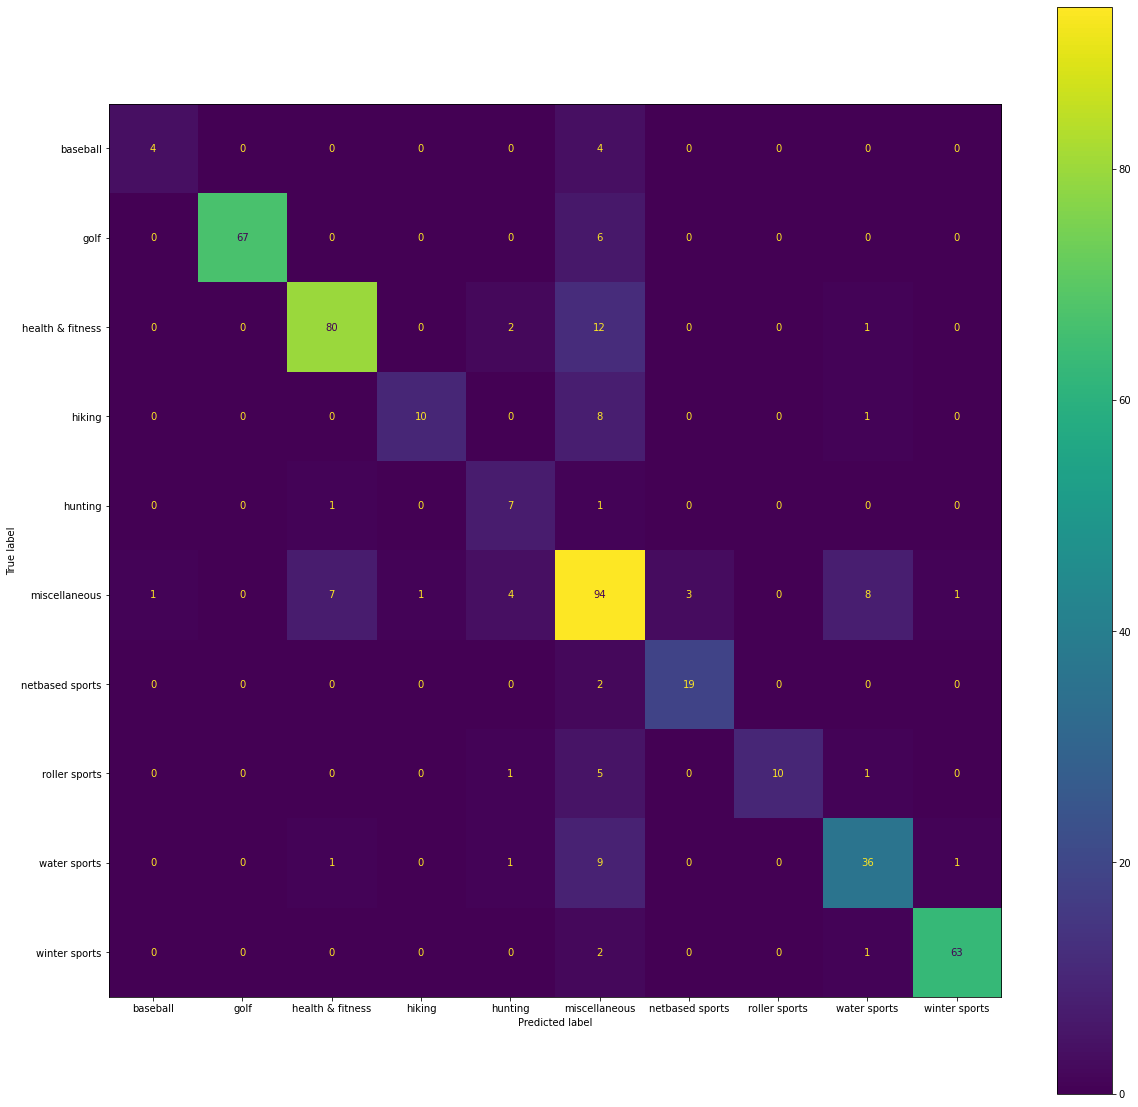

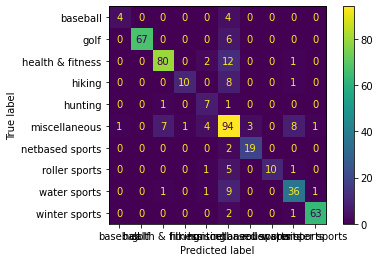

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred_SVM, labels=SVMmodel.classes_)
fig, ax = plt.subplots(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVMmodel.classes_) 
disp.plot()
disp.plot(ax=ax)
plt.show()

In [27]:
#lda
import gensim
stop_words_removed = []
for sentence in processed_data_texts:
    words = []
    words.append(sentence.split(' '))
    stop_words_removed.append(sentence.split(' '))
    
dictionary = gensim.corpora.Dictionary(stop_words_removed) 
bow_c4 = [dictionary.doc2bow(doc) for doc in stop_words_removed] 
print(bow_c4[1])
lda_model = gensim.models.LdaModel(bow_c4,
num_topics=10, id2word=dictionary)
for idx, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(idx, topic))
lda_model[bow_c4[1]]

[(8, 1), (9, 1), (10, 2)]
Topic: 0 
Words: 0.030*"surfboard" + 0.011*"new" + 0.008*"condition" + 0.007*"fin" + 0.007*"size" + 0.007*"wetsuit" + 0.007*"bike" + 0.005*"fish" + 0.005*"contact" + 0.005*"text"
Topic: 1 
Words: 0.037*"size" + 0.033*"oregon" + 0.029*"condition" + 0.026*"snowboard" + 0.018*"kid" + 0.014*"burton" + 0.013*"good" + 0.013*"boy" + 0.011*"interested" + 0.011*"woman"
Topic: 2 
Words: 0.051*"ski" + 0.035*"boot" + 0.031*"size" + 0.028*"woman" + 0.024*"girl" + 0.019*"text" + 0.018*"call" + 0.017*"please" + 0.014*"new" + 0.014*"men"
Topic: 3 
Words: 0.016*"condition" + 0.012*"new" + 0.009*"steelhead" + 0.008*"great" + 0.008*"used" + 0.008*"size" + 0.008*"rubber" + 0.007*"pair" + 0.007*"good" + 0.007*"helmet"
Topic: 4 
Words: 0.022*"boot" + 0.020*"new" + 0.017*"ski" + 0.013*"golf" + 0.011*"size" + 0.010*"iron" + 0.009*"condition" + 0.009*"junior" + 0.009*"brand" + 0.008*"used"
Topic: 5 
Words: 0.034*"ski" + 0.018*"condition" + 0.017*"size" + 0.012*"boy" + 0.011*"boot" + 0

[(0, 0.020121036),
 (1, 0.02012097),
 (2, 0.020131165),
 (3, 0.020122066),
 (4, 0.818882),
 (5, 0.020126734),
 (6, 0.020122726),
 (7, 0.02012211),
 (8, 0.02012845),
 (9, 0.020122705)]

In [14]:
from sklearn.metrics import precision_score
acc = []
acc_NB = precision_score(test_y, y_pred_NB, average='weighted')  # evaluate accuracy rate of Naive Bayes model
print("Naive Bayes model Precision:: {:.2f}%".format(acc_NB*100))
acc.append(acc_NB*100)
acc_RF = precision_score(test_y, y_pred_RF, average='weighted')  # evaluate accuracy rate of Random Forest model
print("Random Forest Model Precision:: {:.2f}%".format(acc_RF*100))
acc.append(acc_RF*100)
acc_SVM = precision_score(test_y, y_pred_SVM, pos_label="Spam", average='weighted')  # evaluate accuracy rate of SVM model
print("SVM model Precision:: {:.2f}%".format(acc_SVM*100))
acc.append(acc_SVM*100)

Naive Bayes model Precision:: 72.10%
Random Forest Model Precision:: 71.96%
SVM model Precision:: 84.13%


C:\Users\Vinod Iyer\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinod Iyer\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'Spam') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [15]:
#Pre-processing for Neural Network
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(input_data['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = tokenizer.texts_to_sequences(input_data['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Found 16370 unique tokens.
Shape of data tensor: (2373, 250)


In [16]:
Y = pd.get_dummies(input_data['sport']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2373, 10)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2135, 250) (2135, 10)
(238, 250) (238, 10)


In [18]:
#LSTM
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 5,081,410
Trainable params: 5,081,410
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
from keras.callbacks import EarlyStopping

epochs = 8
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/8
31/31 [==============================] - 22s 714ms/step - loss: 0.3271 - accuracy: 0.8876 - val_loss: 1.2003 - val_accuracy: 0.7009
Epoch 2/8
31/31 [==============================] - 22s 712ms/step - loss: 0.3266 - accuracy: 0.9058 - val_loss: 1.2050 - val_accuracy: 0.7009
Epoch 3/8
31/31 [==============================] - 23s 730ms/step - loss: 0.2870 - accuracy: 0.9240 - val_loss: 1.2163 - val_accuracy: 0.7056
Epoch 4/8
31/31 [==============================] - 24s 769ms/step - loss: 0.5622 - accuracy: 0.8584 - val_loss: 1.1905 - val_accuracy: 0.6869
Epoch 5/8
31/31 [==============================] - 24s 781ms/step - loss: 0.3210 - accuracy: 0.9089 - val_loss: 1.2126 - val_accuracy: 0.6776
Epoch 6/8
31/31 [==============================] - 25s 799ms/step - loss: 0.1935 - accuracy: 0.9599 - val_loss: 1.1254 - val_accuracy: 0.7103
Epoch 7/8
31/31 [==============================] - 25s 814ms/step - loss: 0.1410 - accuracy: 0.9672 - val_loss: 1.1558 - val_accuracy: 0.7056
Epoch 

In [24]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

8/8 [==============================] - 0s 31ms/step - loss: 1.2417 - accuracy: 0.6849
Test set
  Loss: 1.242
  Accuracy: 0.685


In [64]:
#Convolution Neural Network
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 250, 100)          5000000   
                                                                 
 conv1d_4 (Conv1D)           (None, 250, 32)           9632      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 125, 32)          0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4000)              0         
                                                                 
 dense_10 (Dense)            (None, 10)                40010     
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                     

In [25]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Epoch 1/10
31/31 [==============================] - 18s 589ms/step - loss: 0.0734 - accuracy: 0.9870 - val_loss: 1.1970 - val_accuracy: 0.7150
Epoch 2/10
31/31 [==============================] - 19s 612ms/step - loss: 0.0714 - accuracy: 0.9885 - val_loss: 1.0048 - val_accuracy: 0.7710
Epoch 3/10
31/31 [==============================] - 19s 624ms/step - loss: 0.1824 - accuracy: 0.9505 - val_loss: 1.1780 - val_accuracy: 0.7336
Epoch 4/10
31/31 [==============================] - 20s 649ms/step - loss: 0.0956 - accuracy: 0.9823 - val_loss: 1.1506 - val_accuracy: 0.7103
Epoch 5/10
8/8 [==============================] - 0s 32ms/step - loss: 1.3662 - accuracy: 0.6807
Test set
  Loss: 1.366
  Accuracy: 0.681
